<a href="https://colab.research.google.com/github/amiranissian/ai-ml-principles-exercises/blob/main/ML-training/cv-crash-course/Digit_classification_sklearn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn

In [2]:
import sklearn.datasets as datasets

In [3]:
data = datasets.load_digits()

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
data.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [6]:
import numpy as np
from PIL import Image

2


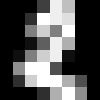

In [7]:
i = 2
print(data.target[i])
Image.fromarray((data.images[i] /16 * 255).astype(np.uint8), "L").resize((100, 100), resample= Image.NEAREST)

In [8]:
data.target[5]

5

In [9]:
data.images.reshape((len(data.images), -1)).shape



(1797, 64)

# Add some thing
* I did
* again

---
asdf



In [10]:
from sklearn.model_selection import train_test_split

In [11]:
flat_dataset = data.images.reshape((len(data.images),-1))
X_train, X_test, y_train, y_test = train_test_split(flat_dataset, data.target, train_size= 0.8)

In [12]:
X_train.shape

(1437, 64)

7


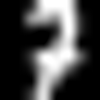

In [13]:
print(y_train[1])
Image.fromarray((X_train[1].reshape((8,8))/16 * 255).astype(np.uint8), "L").resize((100, 100))

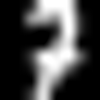

In [14]:
Image.fromarray((X_train[1].reshape((8,8))/16 * 255).astype(np.uint8), "L").resize((100, 100))

3


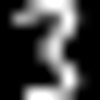

In [15]:
print(y_test[1])
Image.fromarray((X_test[1].reshape((8,8))/16 * 255).astype(np.uint8), "L").resize((100, 100))

In [16]:
from sklearn import svm



In [17]:
model = svm.SVC(gamma=0.001)
model.fit(X_train, y_train)

SVC(gamma=0.001)

In [18]:
# Predict the first ten samples from the test dataset
model.predict(X_test[0:10])

array([5, 3, 7, 4, 3, 2, 9, 5, 9, 5])

In [19]:
# Show the first ten ground truth values from the test dataset
y_test[0:10]

array([5, 3, 7, 4, 3, 2, 9, 5, 9, 5])

In [20]:
# Compare predicted and true
model.predict(X_test[0:10]) == y_test[0:10]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [21]:
from sklearn import metrics

predicted = model.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.97      1.00      0.99        34
           2       1.00      1.00      1.00        34
           3       0.97      1.00      0.99        39
           4       1.00      0.93      0.96        43
           5       1.00      1.00      1.00        38
           6       1.00      1.00      1.00        31
           7       1.00      0.97      0.99        34
           8       0.96      0.96      0.96        26
           9       0.93      0.98      0.95        42

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



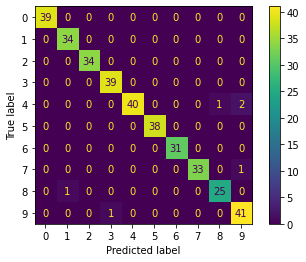

In [22]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)

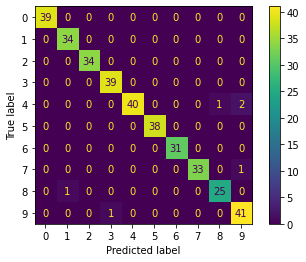

In [24]:
import pickle

In [25]:
with open("model.pkl", "wb") as fio:
  pickle.dump(model, fio)

In [26]:
with open("model.pkl", "rb") as fio:
  mymodel = pickle.load(fio)

In [27]:
# Test that the loaded model is still capabe to predict accurately
mymodel.predict(X_test[:10]) == y_test[:10]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [77]:
im = Image.open("2.jpg").resize((8,8))

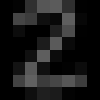

In [78]:
im.resize((100,100), resample=Image.NEAREST)

In [87]:
#convert from (8,8,3)to (8,8)
im = np.zeros((8,8,3))
np_img = im[:,:,0]
print(np_img.shape)

(8, 8)


In [81]:
np_im = np.array(np_img)

In [82]:
np_im.shape

(8, 8)

In [83]:
# We need to transform this image to the same format as the images in the test and train datasets
preprocessed_img = np_im.astype(np.float32) / 255 * 16

In [84]:
# We also need to flatten it as we did with the training data and expand the "batch" dimension so that we get a list of one image
preprocessed_img.flatten()[None].shape

(1, 64)

In [85]:
model.predict(preprocessed_img.flatten()[None])

array([1])

In [86]:
np.where(y_test == 1)

(array([ 19,  26,  55,  61,  62,  77, 105, 112, 131, 135, 138, 141, 144,
        149, 174, 182, 186, 191, 192, 200, 213, 218, 223, 224, 232, 253,
        268, 275, 296, 297, 307, 311, 315, 328]),)